<img src="https://snipboard.io/hzEuw1.jpg">

# Data Visualization:  From Jupyter to Dashboards
### Session 1: Plotting with Pandas
Author:  David Yerrington

## Learning Objectives

- Become familiar with Jupyter Lab plotting convensions
- Describe the integration between matplotlib and Pandas
- Understand the concept of "figure" and "axes."
- Implement standard plots using Pandas

### Prerequisite Knowledge
- Basic Pandas 
  - Difference between Series vs Dataframe
  - Bitmasks, query function, selecting data
  - Aggregations

## Environment Setup

<span style="color: red">If you are reading this and you haven't setup your local Python environment, please review [the setup guide](../environment.md) ASAP!</span>

### Imports

In [3]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt

### Load a Dataset
<img src="https://storage.googleapis.com/kaggle-datasets-images/2619/4359/e3ef5846d64dc9a747afd82273456328/dataset-cover.jpg" class="Header_CoverImg-sc-1431b7d ibFJYv">

This is a Pokemon dataset and it's from [Kaggle](https://www.kaggle.com/terminus7/pokemon-challenge).  

> Pokemon are creatures that fight each other, in a turn-based RPG game.

In [4]:
df = pd.read_csv("../data/pokemon.csv", encoding = "utf8")

Inspect, then view a few records of the dataset. 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        799 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
#,800.0,400.50000,231.084400,1.0,200.75,400.5,600.25,800.0
HP,800.0,69.25875,25.534669,1.0,50.00,65.0,80.00,255.0
Attack,800.0,79.00125,32.457366,5.0,55.00,75.0,100.00,190.0
Defense,800.0,73.84250,31.183501,5.0,50.00,70.0,90.00,230.0
Sp. Atk,800.0,72.82000,32.722294,10.0,49.75,65.0,95.00,194.0
Sp. Def,800.0,71.90250,27.828916,20.0,50.00,70.0,90.00,230.0
Speed,800.0,68.27750,29.060474,5.0,45.00,65.0,90.00,180.0
Generation,800.0,3.32375,1.661290,1.0,2.00,3.0,5.00,6.0


In [7]:
df

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True


### Enable Inline Plotting

Plots can be displayed many ways.  Saved as separate files.  Opened with a display application independant of Juptyer. Or within Jupyter itself.

> Read more about Jupyter [magic commands](https://ipython.readthedocs.io/en/stable/interactive/magics.html).

In [8]:
# Turn on inline plotting
%matplotlib inline

### Quick Pandas Review:  Axis, Series, and DataFrame

![](https://snipboard.io/8i3yIz.jpg)

### Plotting with Pandas .plot

Generally, both series and DataFrame objects in Pandas offer the opportunity to plot.

In [9]:
### A line plot from a series

<AxesSubplot:>

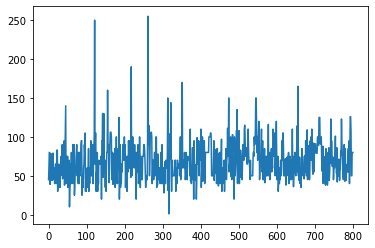

In [10]:
df['HP'].plot()

In [11]:
### A scatter plot from 2 dimension columns

<AxesSubplot:xlabel='Defense', ylabel='Attack'>

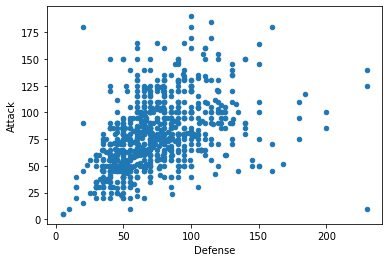

In [12]:
df.plot(kind = "scatter", x = "Defense", y = "Attack")

In [13]:
### A histogram plot from a series

<AxesSubplot:ylabel='Frequency'>

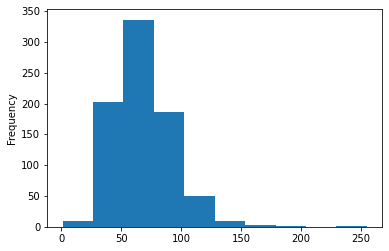

In [14]:
df['HP'].plot(kind = "hist")

In [15]:
### A barh plot from a group DataFrame aggregation

<AxesSubplot:ylabel='Type 1'>

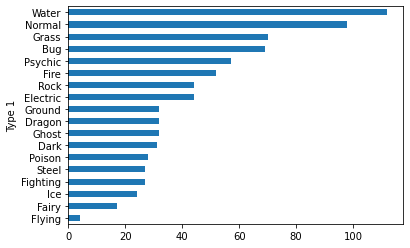

In [16]:
df.groupby('Type 1').size().sort_values().plot(kind="barh")

In [17]:
### Box plot from masked filter 

<AxesSubplot:title={'center':'Dragon Type Pokemon Boxplot'}>

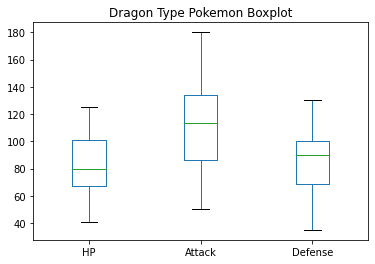

In [50]:
mask = df['Type 1'] == "Dragon"
df[mask][['HP', 'Attack', 'Defense']].plot(kind = "box", title = "Dragon Type Pokemon Boxplot")

<AxesSubplot:>

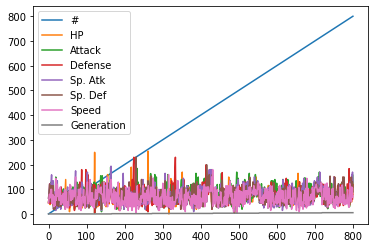

In [19]:
df.plot()

### Plot Aethetics

<AxesSubplot:title={'center':'Pokemon by Type $\\sqrt{2}$'}, ylabel='Type 1'>

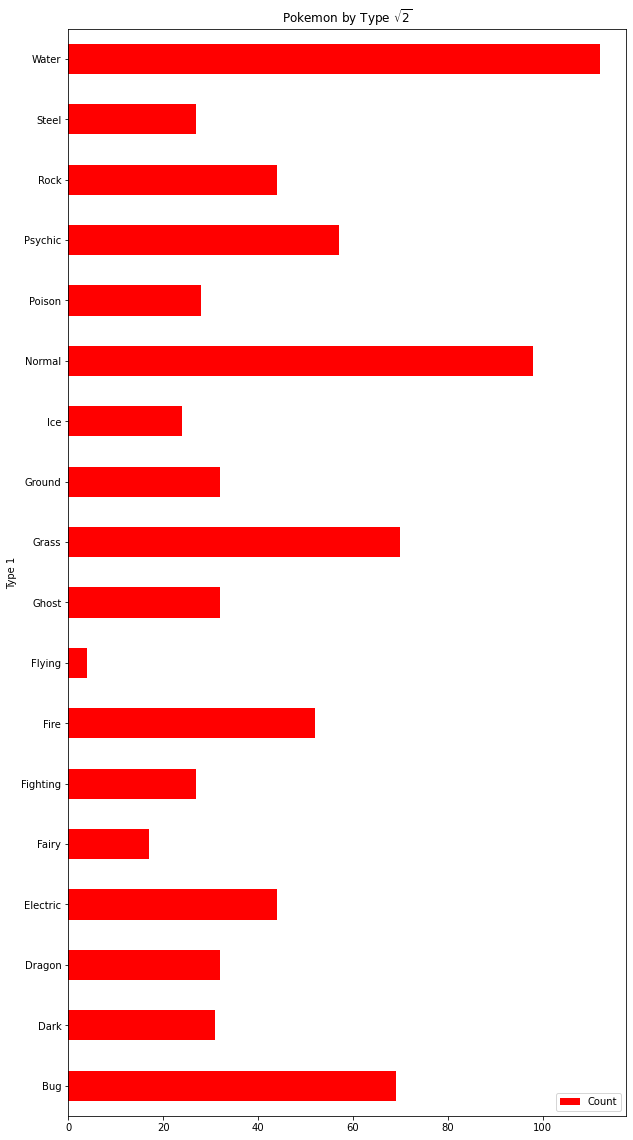

In [20]:
df.groupby(['Type 1']).size().plot(
    title = "Pokemon by Type $\sqrt{2}$",
    kind = "barh", 
    figsize = (10, 20), 
    color = "red", 
    label = "Count", 
    legend = True
)

### Controlling Aethetics

[Matplotlib Colormpas Reference](https://matplotlib.org/examples/color/colormaps_reference.html)

### With Slack: Try to plot plot something from this dataset and post a screenshot (thread).

We will check out the thread at the end of the 1st session.  Also share any code!

### Matplotlib: Figure vs Axes

**Figure** and **Axes** are two of the most fundamental constructs within Matplotlib.  

#### Figure

Figure is like a canvas.  The figure defines the space in which objects can be placed within.  Objects can be annotations and text objects, lines, scatters, and many other types of visual elements.


#### Axes

Axes is a visual object such as a set of points, line vectors, and generally "generate" visual objects that can be placed on a figure.

- Histograms
- Lines
- Horizontal or vertical lines
- x or y ticks

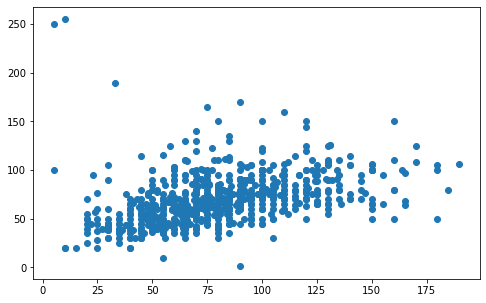

## Matplotlib vs Pandas

Matplotlib:  Line plot

<AxesSubplot:>

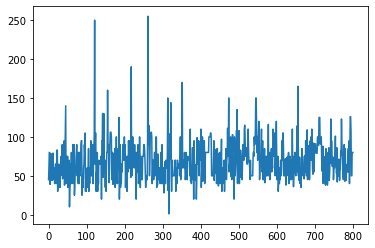

In [28]:
# fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 5))
# ax.plot(df['HP'])
df['HP'].plot()

In [ ]:
Pandas:  Line Plot

<AxesSubplot:>

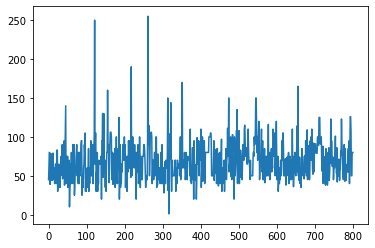

In [29]:
df['HP'].plot()

In [ ]:
Matplotlib:  Scatter

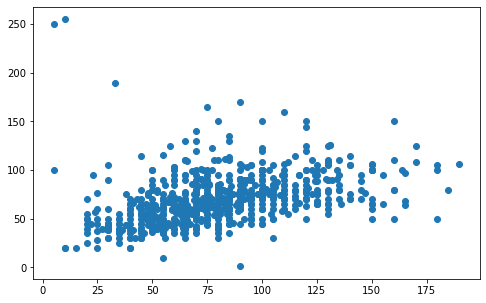

In [30]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8, 5))
ax.scatter(df['Attack'], df['HP'])

Pandas: Scatter

<AxesSubplot:xlabel='Attack', ylabel='HP'>

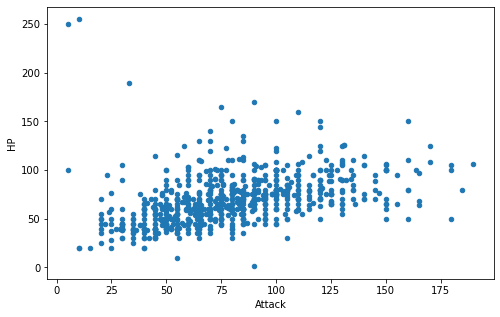

In [34]:
df.plot(kind = "scatter", x = "Attack", y = "HP", figsize = (8, 5))

#### Figure vs Axes vs Plt Object

A Matplotlib figure is a canvas that can contain one or many visual axes elements.  It's possible to use both with `plt.` object because both are extended from `plt.`.

### Time Permitting:  Subplots with Matplotlib

Almost everyone asks about subplots with Matplotlib and while we may not fully engage on this topic, I wanted to give you this example just to show that it's actually not that bad.

**What's different with a single plot vs multiple plots?**
 - `ax` (the axes) are now an array that is the same size and shape of visual subplot matrix.
 - Each offset within `ax` refers to a subplot within the figure matrix.

**What's the same?**
- `fig` still refers to the entire canvas / plot image

> The size of the subplot matrix is determined by `nrows` and `ncols`.  If you passed `nrows = 5` and `ncols = 3`, ax would be a 5x3 matrix.  `ax` would have 5 rows and 3 columns.

Text(0.35, 0.5, 'Row 1, column 1')

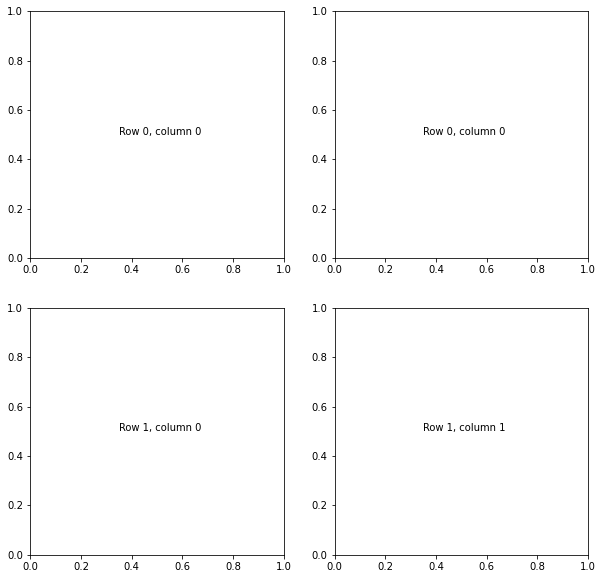

In [43]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))

# Add annotations so you can see which figures they belong to
ax[0, 0].text(.35, .5, "Row 0, column 0")
ax[0, 1].text(.35, .5, "Row 0, column 0")
ax[1, 0].text(.35, .5, "Row 1, column 0")
ax[1, 1].text(.35, .5, "Row 1, column 1")

The same thing but with matplotlib plots

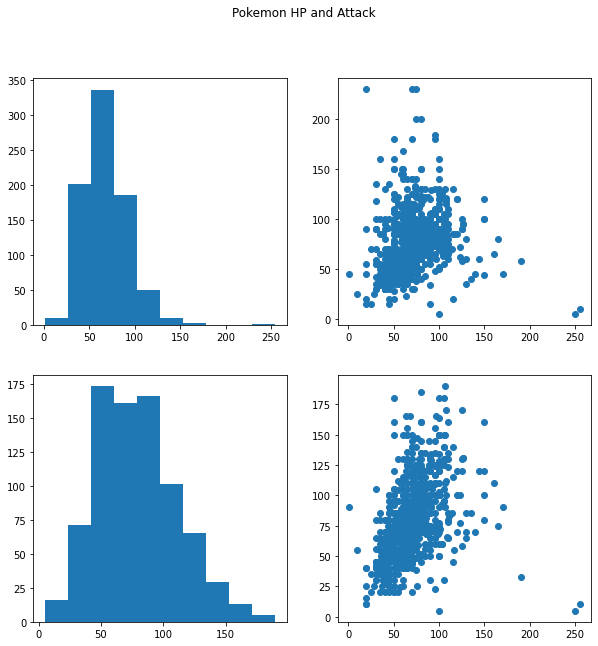

In [48]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
fig.suptitle("Pokemon HP and Attack")

# Add annotations so you can see which figures they belong to
ax[0, 0].hist(df['HP'])
ax[0, 1].scatter(df['HP'], df['Defense'])
ax[1, 0].hist(df['Attack'])
ax[1, 1].scatter(df['HP'], df['Attack'])

## Summary

We will take this poll first
`/poll "What is the hardest point to understand in this session?" "Matplotlib" "Plotting with Pandas" "Nothing!" anonymous`

- Plotting with Pandas is actually an abstract way of plotting with Matplotlib through a single function `.plot()`
- Matplotlib `figure` is like a canvas that defines the space that visual objects can be placed.
- Matplotlib `axes` are visual objects such as lines, scatter points, and histograms.
